# Exploratory Data Analysis
Based on the Kaggle notebook of Akhil Reddy: [Formula 1, A Visual Explorative Analysis](https://www.kaggle.com/code/akhilreddy9554/formula-1-a-visual-explorative-analysis).

## Imports and constants

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime 

In [2]:
DATA_FOLDER = './data/'

In [8]:
# Comment if you don't want dark theme
#plt.style.use('dark_background')

## Load files

In [4]:
circuits = pd.read_csv(DATA_FOLDER + 'circuits.csv')
laptimes = pd.read_csv(DATA_FOLDER + 'lap_times.csv')
pitstops = pd.read_csv(DATA_FOLDER + 'pit_stops.csv')
seasons = pd.read_csv(DATA_FOLDER + 'seasons.csv',parse_dates=['year'])
status = pd.read_csv(DATA_FOLDER + 'status.csv')

In [5]:
constructor_standings = pd.read_csv(DATA_FOLDER + 'constructor_standings.csv')
constructors = pd.read_csv(DATA_FOLDER + 'constructors.csv')
driver_standings = pd.read_csv(DATA_FOLDER + 'driver_standings.csv')
drivers = pd.read_csv(DATA_FOLDER + 'drivers.csv')

In [6]:
races = pd.read_csv(DATA_FOLDER + 'races.csv',parse_dates=['year'])
constructor_results = pd.read_csv(DATA_FOLDER + 'constructor_results.csv')
results = pd.read_csv(DATA_FOLDER + 'results.csv')
qualifying = pd.read_csv(DATA_FOLDER + 'qualifying.csv')

## Constructor analysis

In [7]:
#merging the constructors dataframe with race results
teams = constructors.merge(results,on='constructorId',how = 'left')

### Most wins

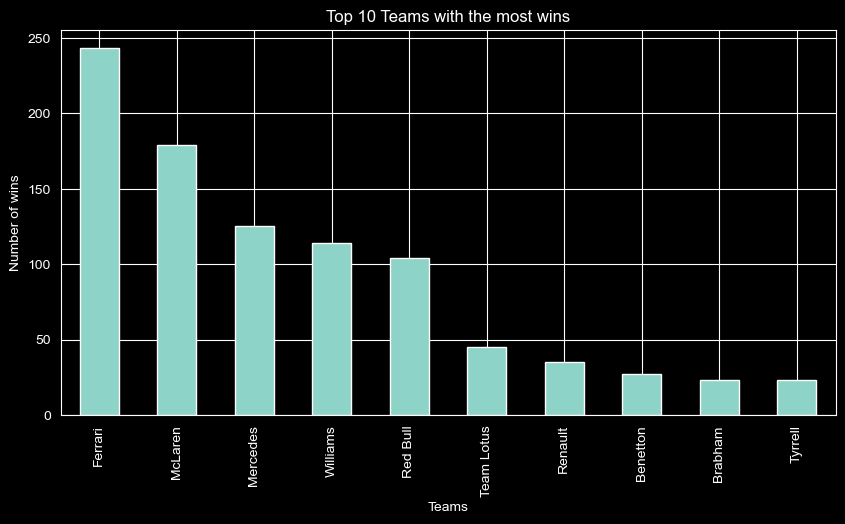

In [8]:
# get the number of wins per team
team_wins = teams[teams['positionOrder'] == 1].groupby('name')['name'].count().sort_values(ascending=False)

# plot the 10 teams with the most wins
plt.figure(figsize=(10,5))
team_wins[:10].plot(kind='bar')
plt.title('Top 10 Teams with the most wins')
plt.ylabel('Number of wins')
plt.xlabel('Teams')

#plt.gcf().set_facecolor('none')
# Save the figure with a transparent background
plt.savefig('./img/most_team_win.png', transparent=True)
plt.show()


### Most races participated in

In [9]:
#extracting the columns needed and grouping it by constructor name, extracting the total races entered

team_races = teams[['name','points','raceId']]
team_races = team_races.groupby('name')['raceId'].nunique().sort_values(ascending=False)

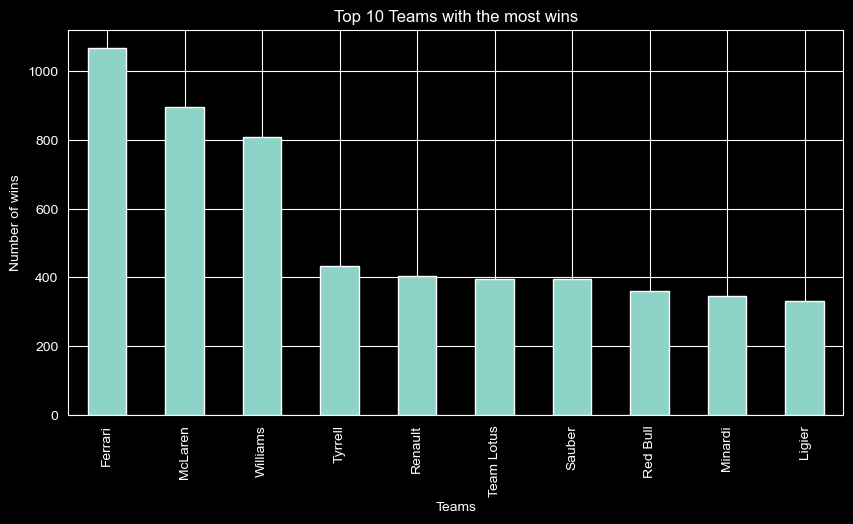

In [10]:
# plot using matplotlib
plt.figure(figsize=(10,5))
team_races[:10].plot(kind='bar')
plt.title('Top 10 Teams with the most wins')
plt.ylabel('Number of wins')
plt.xlabel('Teams')
plt.savefig('./img/most_races.png', transparent=True)
plt.show()

## Geography

### Drivers Distribution by Country

In [ ]:
# grouping by nationality, counting the driver and plotting a pie chart

driver_nationality = drivers.groupby('nationality')['nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
fig = go.Figure(data=[go.Pie(labels=driver_nationality.nationality.head(10), values=driver_nationality['number of drivers'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Historical Driver Nationality Distribution since 1950")

fig.write_image("img/nationality_dist.png")
fig.show()

### Number of Champions by Country

In [12]:
#merging drivers, driver standings and race data 
driver_position = drivers.merge(driver_standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')

champions = driver_position.groupby(['nationality','year','surname'])[['points','wins']
                                            ].max().sort_values('points',ascending = False).reset_index()
champions.drop_duplicates(subset=['year'], inplace=True)

<Figure size 1000x500 with 0 Axes>

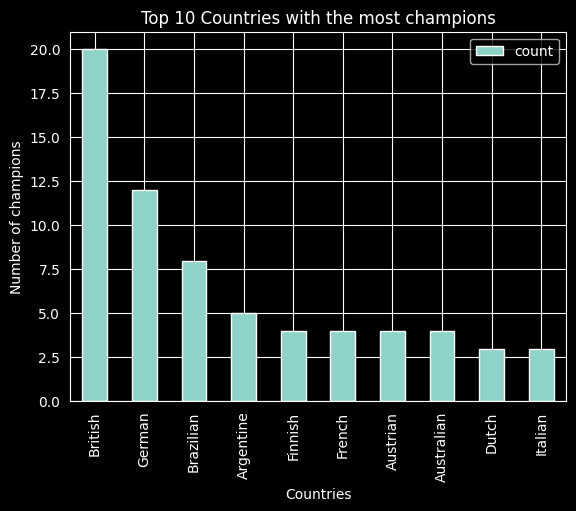

In [13]:
champion_nations = champions.nationality.value_counts().sort_values(ascending=False).to_frame().head(10)
# plot the number champions for the top 10 countries in matplotlib
plt.figure(figsize=(10,5))
champion_nations.plot(kind='bar')
plt.title('Top 10 Countries with the most champions')
plt.ylabel('Number of champions')
plt.xlabel('Countries')
plt.savefig('./img/most_countries.png', transparent=True)
plt.show()

### Distribution of Champions by Country

In [ ]:
# counting the number of times a nation ended in P1 and plotting a pie chart

champion_nations = champions.nationality.value_counts().to_frame()
fig = go.Figure(data=[go.Pie(labels=champion_nations.index, values=champion_nations['nationality'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Distribution of Historic Champions by Nation")
fig.show()

### Ratio of champions according to the nation number of drivers

In [ ]:
#grouping by nationality year and surname to get the max points achieved every season and dropping year duplicates

champion_drivers = driver_position.groupby(['nationality','year','surname'])[['points','wins']
                                            ].max().sort_values('points',ascending = False).reset_index()
champion_drivers.drop_duplicates(subset=['year'], inplace=True)

#grouping by nationality and counting the surname of drivers 

final = champion_drivers.groupby('nationality')['surname'].nunique().reset_index(name = 'champions').sort_values(
    by='champions',ascending = False)

#merging both the datasets and creating a column to calculate the ratio

ratios = final.merge(driver_nationality,on='nationality',how='inner')
ratios['perc_winners'] = (ratios.champions/ratios['number of drivers']*100).round(2)
ratios = ratios.sort_values('perc_winners',ascending = False)

In [ ]:
#creating a bar chart

df = ratios
fig = px.bar(df, x='nationality', y='perc_winners',
         hover_data=['champions','number of drivers'], color='number of drivers',
         height=400)
fig.update_traces(textfont_size=20,
              marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Champions from a nation with respect to total drivers from the nation")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

## Drivers analysis

### Number of race wins

In [17]:
race_wins = drivers.merge(results,left_on='driverId',right_on='driverId',how = 'left')
race_wins['full_name'] = race_wins['forename'] + ' ' + race_wins['surname']

race_wins = race_wins[['full_name','positionOrder']]

highest_rw = race_wins[race_wins['positionOrder'] == 1.0].groupby('full_name').count().sort_values('positionOrder', ascending = False).reset_index()

<Figure size 1000x500 with 0 Axes>

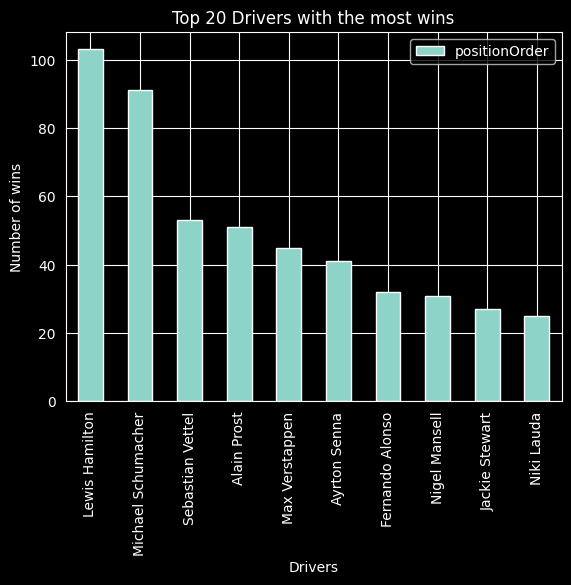

In [18]:
# gen a graph of the top 20 drivers with the most wins using matplotlib

plt.figure(figsize=(10,5))
highest_rw[:10].plot(kind='bar',x='full_name',y='positionOrder')
plt.title('Top 20 Drivers with the most wins')
plt.ylabel('Number of wins')
plt.xlabel('Drivers')
plt.savefig('./img/most_race_win.png', transparent=True)
plt.show()


### Number of pole positions

In [19]:
driver_quali = results.merge(drivers,left_on = 'driverId',right_on='driverId',how = 'left')
driver_quali['full_name'] = driver_quali['forename'] + ' ' + driver_quali['surname']
driver_quali = driver_quali[['full_name','grid','position']]


quali_wins = driver_quali[driver_quali['grid'] == 1].groupby('full_name')['grid'].sum().reset_index(
                                        name = 'grid poles').sort_values('grid poles',ascending = False)

quali_wins = quali_wins.reset_index(col_level=0)
quali_wins.drop('index',axis = 1,inplace = True)

<Figure size 1000x500 with 0 Axes>

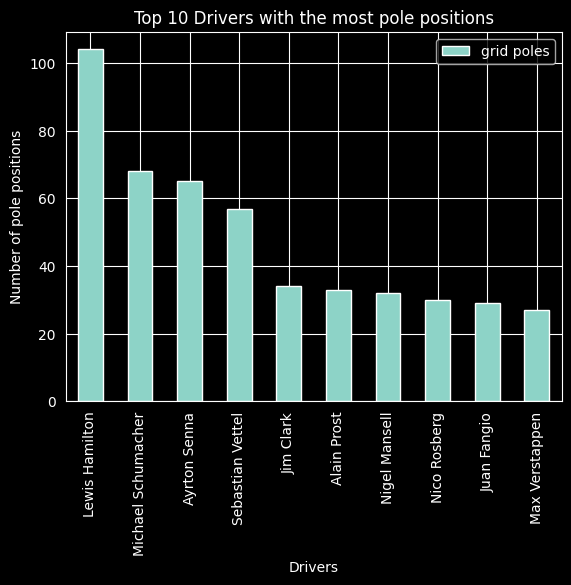

In [20]:
# plot the top 10 drivers with the most pole positions using matplotlib
plt.figure(figsize=(10,5))
quali_wins[:10].plot(kind='bar',x='full_name',y='grid poles')
plt.title('Top 10 Drivers with the most pole positions')
plt.ylabel('Number of pole positions')
plt.xlabel('Drivers')
plt.savefig('./img/most_pole.png', transparent=True)
plt.show()

### Most wins in a single season

In [21]:
#merging driver data, their standings and race data

driver_position = drivers.merge(driver_standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')

In [22]:
#filtering the dataset to include only where the position is 1 and grouping by name, year and extracting the max wins

positions = driver_position[driver_position['position'] == 1].groupby(
    ['surname','year'])['wins'].max().sort_values(ascending=False).reset_index(name = 'Wins')
positions.head(20)
positions.year = positions.year.dt.year
positions.rename(columns={'surname':'name'},inplace=True)
positions.Wins = positions.Wins.astype('int64')

In [23]:
#plotting a bubble chart

fig = px.scatter(positions.head(30), x="year", y="Wins", color="name",
                 title="Most wins by a driver in a single season",size = 'Wins')
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.show()

## Circuit Stats: Fastest Lap on each Circuit

In [8]:
# gathering races, results and drivers data
circuit_summary = circuits.merge(races,left_on='circuitId', right_on='circuitId', how = 'left')
circuit_summary = circuit_summary.merge(results,on='raceId',how = 'left')
circuit_summary = circuit_summary.merge(drivers,left_on='driverId',right_on='driverId',how = 'inner')

# dropping null values and converting fastestlaptime into seconds
circuit_summary = circuit_summary.dropna(subset=['fastestLapTime'], axis = 0)
circuit_summary = circuit_summary.rename(columns={'name_x':'circuit_name','name_y':'driver_name'})
# remove rows with \N value in fastestLapTime
circuit_summary = circuit_summary[circuit_summary['fastestLapTime'] != '\\N']
circuit_summary['fastestLapTime_seconds']=circuit_summary['fastestLapTime'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1])) 

#grouping by circuit name and extracting the fastest lap time, keeping all circuit_summary columns
circuit_summary['fastest_recorded_lap'] = circuit_summary.groupby(['circuit_name'])['fastestLapTime_seconds'].transform('min')
fastest = circuit_summary[circuit_summary['fastest_recorded_lap']==circuit_summary['fastestLapTime_seconds']].sort_values('country').reset_index(col_level = 1)
fastest.drop(['index','fastest_recorded_lap'],inplace=True,axis = 1)
fastest['year'] = fastest.year.dt.year

# rename alt by altitude [m]
fastest.rename(columns={'alt':'altitude [m]'},inplace=True)

C:\Users\xagao\AppData\Local\Temp\ipykernel_28612\1462291787.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


<Figure size 1000x500 with 0 Axes>

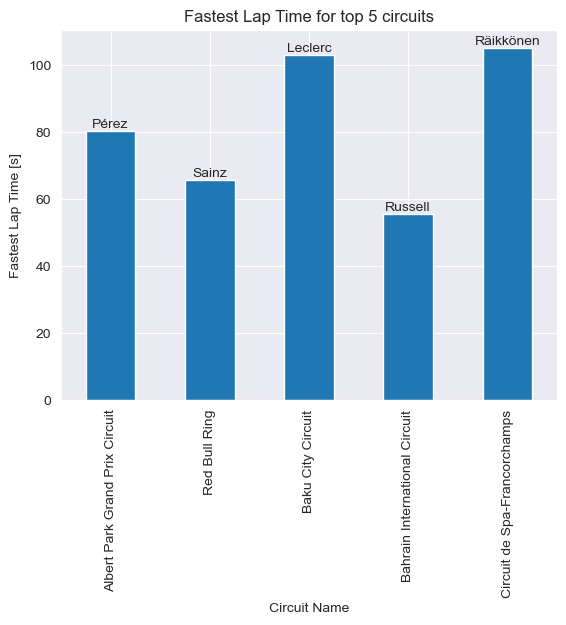

In [9]:
plt.figure(figsize=(10,5),constrained_layout=True)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fastest.head(5).plot(kind='bar',x='circuit_name',y='fastestLapTime_seconds')
plt.title('Fastest Lap Time for top 5 circuits')
plt.ylabel('Fastest Lap Time [s]')
plt.xlabel('Circuit Name')

# add driver name as annotation
for i in range(5):
    plt.text(i,fastest['fastestLapTime_seconds'][i]+1,fastest['surname'][i],rotation=0, ha='center')
    
plt.legend().remove()
plt.savefig('./img/fastest_lap_l.png', transparent=True, bbox_inches='tight')
plt.show()

####  